In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
filepath = 'C:\\Users\\kim\\Downloads\\ny.csv'
raw = pd.read_csv(filepath)

# Remove the first 3 rows of the data as it's superfluous
raw = raw[3:]

# Set the columns to be the Oth row
raw.columns = raw.iloc[0]

# Drop the 0th row (effectively, we're really just saying, I want to keep everything BUT the 0th row)
raw = raw[1:]
raw.columns=['City','Population','Violent','Murder','Rape1','Rape2','Robbery','AggAssault','PropertyCrime','Burglary','Larceny','Motor','Arson']
raw.head()

,City,Population,Violent,Murder,Rape1,Rape2,Robbery,AggAssault,PropertyCrime,Burglary,Larceny,Motor,Arson
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0
5,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0
6,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0
7,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
8,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN


This is the Linear Regression Model that we're trying to come up with:

Propertycrime=α0 + α1.Population + α2Population2 + α3Murder + α4Robbery

Let's look at the features:

In [3]:
raw['Murder']= pd.to_numeric(raw['Murder'], errors='coerce')
raw['Murder_feature'] = np.where(raw['Murder']>=1, 1, 0)
raw['Murder_feature'].value_counts()

0    302
1     49
Name: Murder_feature, dtype: int64

In [4]:
raw['Robbery'] = pd.to_numeric(raw['Robbery'], errors='coerce')
raw['Robbery_feature'] = np.where(raw['Robbery']>=1, 1, 0)
raw['Robbery_feature'].value_counts()

1    207
0    144
Name: Robbery_feature, dtype: int64

In [5]:
raw['Population'].head()

4     1,861
5     2,577
6     2,846
7    97,956
8     6,388
Name: Population, dtype: object

In [6]:
raw['Population'] = raw['Population'].str.replace(' ', '')
raw['Population'] = raw['Population'].str.replace(',', '')

In [7]:
raw['Population_3'] = pd.to_numeric(raw['Population'])
raw['Population_2'] = raw['Population_3']*raw['Population_3']

In [8]:
raw['Population_2'].head()

4    3.463321e+06
5    6.640929e+06
6    8.099716e+06
7    9.595378e+09
8    4.080654e+07
Name: Population_2, dtype: float64

In [9]:
raw['PropertyCrime'] = pd.to_numeric(raw['PropertyCrime'], errors='coerce')

Now we have all of our features like ready to go!!!  Let's do some Linear Regression, hello!

In [10]:
my_cols = ['Population', 'Population_2', 'Robbery_feature', 'Murder']
data = raw[my_cols].copy()
data.fillna(0, inplace=True)
X = data.as_matrix()
y = raw['PropertyCrime'].fillna(0).as_matrix()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [12]:
data.shape

(351, 4)

In [13]:
data = data.fillna(method='ffill')

In [14]:
data = data.apply(lambda x: pd.to_numeric(x,errors='ignore'))  

In [15]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X_train, y_train)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [  1.50273005e-04  -4.71092715e-12   2.00435423e+02  -2.90289302e+00]
Intercept: 
 42.663182209


In [16]:
regr.score(X_train, y_train)

0.21429588963278368

In [17]:
X_train.shape

(210, 4)

In [18]:
x = data['Population_2']
x.shape

(351,)

In [19]:
y = raw['PropertyCrime']

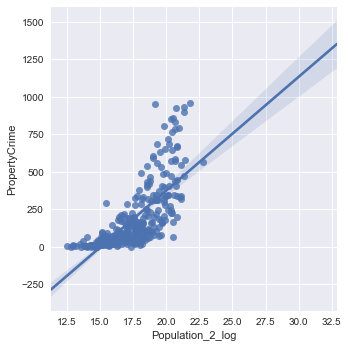

In [20]:
raw['Population_2_log'] = raw['Population_2'].apply(np.log)
sns.lmplot(x='Population_2_log', y='PropertyCrime', data=raw, y_jitter=0.1, x_jitter=0.1)

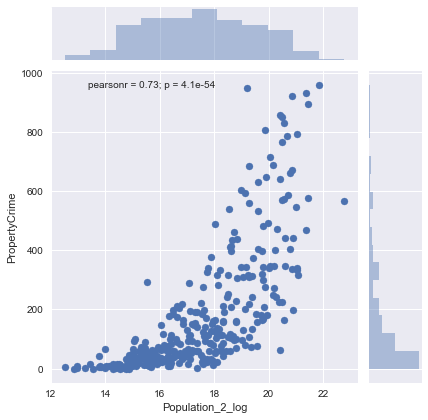

In [21]:
sns.jointplot(x='Population_2_log', y='PropertyCrime', data=raw)

In [22]:
my_cols = ['Population_2_log']
data = raw.dropna(subset=['Population_2_log','PropertyCrime'])
X = raw[my_cols].as_matrix()
y = raw['PropertyCrime'].as_matrix()

In [23]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X_train, y_train)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [  1.50273005e-04  -4.71092715e-12   2.00435423e+02  -2.90289302e+00]
Intercept: 
 42.663182209


In [24]:
regr.score(X_train, y_train)

0.21429588963278368

In [25]:
my_cols = ['Murder']
data = raw.dropna(subset=['Murder','PropertyCrime'])
X = data[my_cols].as_matrix()
y = data['PropertyCrime'].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X_train, y_train)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [ 102.22435689]
Intercept: 
 180.445783133


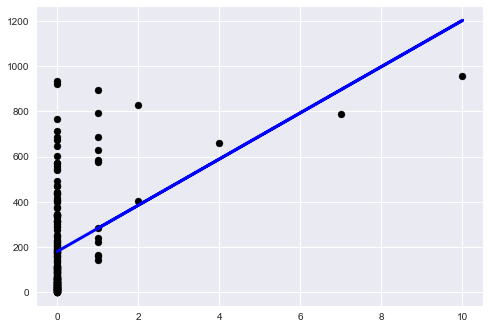

In [26]:
plt.scatter(X_train[:,0], y_train, color='black')
plt.plot(X_train[:,0], regr.predict(X_train), color='blue', linewidth=3)

In [27]:
my_cols = ['Population', 'Population_2_log', 'Robbery_feature', 'Murder']
data = raw[my_cols].copy()
data.fillna(0, inplace=True)
X = data.as_matrix()
y = raw['PropertyCrime'].fillna(0).as_matrix()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X_train, y_train)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [  1.89223767e-04   1.66514345e+01   1.45129163e+02  -5.71568142e+00]
Intercept: 
 -217.484369582


In [29]:
regr.score(X_train, y_train)

0.24955026215837428

So changing Population Squared to the log of Population Squared increased the score, but this is still a really bad model.

In [30]:
raw.columns

Index(['City', 'Population', 'Violent', 'Murder', 'Rape1', 'Rape2', 'Robbery',
       'AggAssault', 'PropertyCrime', 'Burglary', 'Larceny', 'Motor', 'Arson',
       'Murder_feature', 'Robbery_feature', 'Population_3', 'Population_2',
       'Population_2_log'],
      dtype='object')

In [31]:
raw['Larceny'] = raw['Larceny'].str.replace(' ', '')
raw['Larceny'] = raw['Larceny'].str.replace(',', '')
raw['Larceny_1'] = pd.to_numeric(raw['Larceny'])

raw['Violent'] = raw['Violent'].str.replace(' ', '')
raw['Violent'] = raw['Violent'].str.replace(',', '')
raw['Violent_1'] = pd.to_numeric(raw['Larceny'])

raw['Burglary'] = raw['Burglary'].str.replace(' ', '')
raw['Burglary'] = raw['Burglary'].str.replace(',', '')
raw['Burglary_1'] = pd.to_numeric(raw['Burglary'])

raw['AggAssault'] = raw['AggAssault'].str.replace(' ', '')
raw['AggAssault'] = raw['AggAssault'].str.replace(',', '')
raw['AggAssault_1'] = pd.to_numeric(raw['AggAssault'])

raw['Motor'] = raw['Motor'].str.replace(' ', '')
raw['Motor'] = raw['Motor'].str.replace(',', '')
raw['Motor_1'] = pd.to_numeric(raw['Motor'])


raw['Arson'] = raw['Arson'].str.replace(' ', '')
raw['Arson'] = raw['Arson'].str.replace(',', '')
raw['Arson_1'] = pd.to_numeric(raw['Arson'])


raw['Rape1'] = raw['Rape1'].str.replace(' ', '')
raw['Rape1'] = raw['Rape1'].str.replace(',', '')
raw['Rape1_1'] = pd.to_numeric(raw['Rape1'])


raw['Rape2'] = raw['Rape2'].str.replace(' ', '')
raw['Rape2'] = raw['Rape2'].str.replace(',', '')
raw['Rape2_1'] = pd.to_numeric(raw['Rape2'])

In [32]:
my_cols = ['Robbery_feature', 'Murder_feature','Violent_1','Rape1_1','Rape2_1','AggAssault_1','Burglary_1','Larceny_1','Motor_1','Arson_1']
data = raw[my_cols].copy()
data.fillna(0, inplace=True)
X = data.as_matrix()
y = raw['PropertyCrime'].fillna(0).as_matrix()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X_train, y_train)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [  1.53249920e+02   1.35665387e+02   6.23628150e-02  -2.70783396e-13
   1.89977368e+01  -6.11400925e-01  -6.37624271e-01   6.23628148e-02
  -8.08221326e-01  -6.60890829e+00]
Intercept: 
 42.2419654854


In [34]:
regr.score(X_train, y_train)

0.34374713638156806

In [36]:
filepath = 'C:\\Users\\kim\\Downloads\\florida.csv'
florida = pd.read_csv(filepath)

# Set the columns to be the Oth row
florida.columns = florida.iloc[0]

# Drop the 0th row (effectively, we're really just saying, I want to keep everything BUT the 0th row)
florida = florida[1:]
florida.columns=['City','Population','Violent','Murder','Rape1','Rape2','Robbery','AggAssault','PropertyCrime','Burglary','Larceny','Motor','Arson']
florida.head()

,City,Population,Violent,Murder,Rape1,Rape2,Robbery,AggAssault,PropertyCrime,Burglary,Larceny,Motor,Arson
1,Altamonte Springs,42040,150,0,8,NaN,37,105,1564.0,300,1180.0,84,3
2,Altha,536,1,0,0,NaN,0,1,3.0,3,0.0,0,0
3,Apalachicola,2269,1,0,0,NaN,0,1,35.0,8,27.0,0,0
4,Apopka,45397,178,1,11,NaN,57,109,1527.0,231,1202.0,94,6
5,Arcadia,7615,82,2,3,NaN,9,68,172.0,43,123.0,6,4


In [38]:
my_cols = ['Robbery', 'Murder','Violent','Rape1','AggAssault','Burglary','Larceny','Motor','Arson']
data = florida[my_cols].copy()
data.fillna(0, inplace=True)
X = data.as_matrix()
y = florida['PropertyCrime'].fillna(0).as_matrix()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X_train, y_train)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [ -1.40343513e-03   3.58321972e-03   1.31289933e-03   6.36253565e-04
  -1.50313883e-03   9.99975931e-01   1.00012099e+00   9.99286741e-01
  -9.55090021e-04]
Intercept: 
 -0.123135013288


In [40]:
regr.score(X_train, y_train)

0.99999977633837078

In [48]:
my_cols = ['Population','PropertyCrime','Robbery', 'Murder','Violent','Rape1','AggAssault','Burglary','Larceny','Motor','Arson']
data = florida[my_cols].copy()
data.fillna(0, inplace=True)
X = data.as_matrix()

In [50]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'PropertyCrime ~ Population+Violent+Murder+Rape1+Robbery+AggAssault+Burglary+Larceny+Motor+Arson'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=data).fit()

In [51]:
lm.params

Intercept    -6.433607e-02
Population    5.032932e-07
Violent      -1.022632e-03
Murder       -3.675798e-03
Rape1         6.744156e-04
Robbery       1.043560e-03
AggAssault    9.351900e-04
Burglary      1.000019e+00
Larceny       1.000016e+00
Motor         9.999942e-01
Arson         9.794378e-04
dtype: float64

In [52]:
lm.pvalues

Intercept     0.267251
Population    0.860134
Violent       0.799100
Murder        0.832954
Rape1         0.919266
Robbery       0.819635
AggAssault    0.829210
Burglary      0.000000
Larceny       0.000000
Motor         0.000000
Arson         0.953094
dtype: float64

In [53]:
lm.rsquared

0.99999992053800446